In [19]:
# Cell 1 — imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# plotting defaults
plt.rcParams['figure.figsize'] = (10,6)


In [20]:
# Cell 2 — load data
df = pd.read_csv("/content/Housing.csv")   # change filename if needed
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
# Cell 3 — quick inspect
print("Rows, cols:", df.shape)
df.info()
df.describe(include='all').T


Rows, cols: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Cell 4 — basic cleaning ideas (run, adapt as needed)
# Example column names that commonly appear: 'price','sqft_living','bedrooms','bathrooms','sqft_lot','year_built','zipcode','lat','long','condition','grade'
# If your dataset has different names, rename them here.

# Drop exact duplicates
df = df.drop_duplicates()

# Identify missing values
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing>0])

# Example fill / drop strategy (customize):
# df = df.dropna(subset=['price','sqft_living'])   # ensure core columns present
# df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())


Series([], dtype: int64)


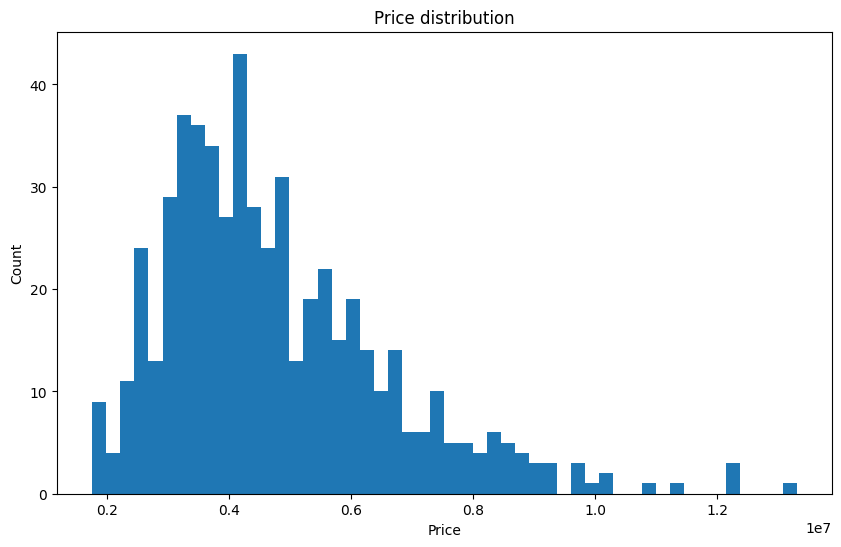

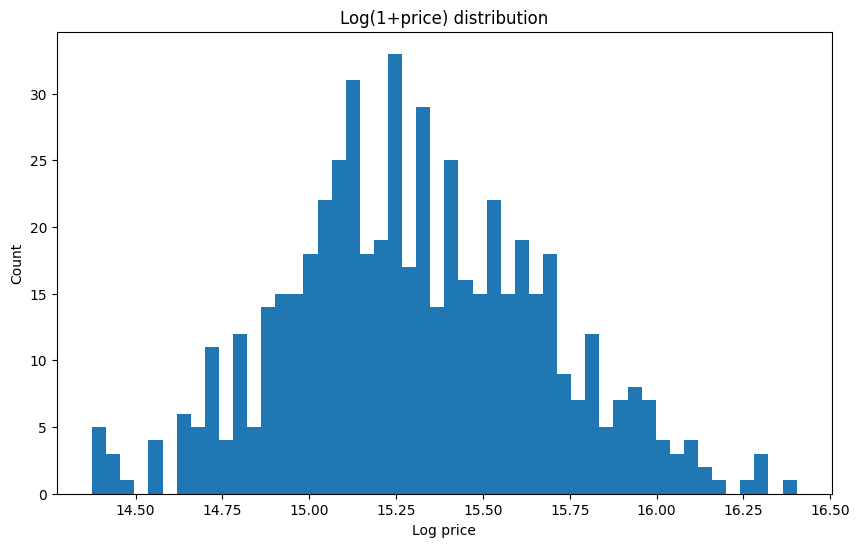

In [23]:
# Cell 6 — price distribution & log-price
if 'price' in df.columns:
    plt.figure()
    plt.hist(df['price'].dropna(), bins=50)
    plt.title("Price distribution")
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

    plt.figure()
    plt.hist(np.log1p(df['price'].dropna()), bins=50)
    plt.title("Log(1+price) distribution")
    plt.xlabel("Log price")
    plt.ylabel("Count")
    plt.show()


In [24]:
# Cell 7 — price vs sqft scatter + linear fit
if {'price','sqft_living'}.issubset(df.columns):
    x = df['sqft_living'].values.reshape(-1,1)
    y = df['price'].values
    mask = (~np.isnan(x.flatten())) & (~np.isnan(y))
    x2 = x[mask]; y2 = y[mask]
    lr = LinearRegression().fit(x2, y2)
    pred = lr.predict(x2)

    plt.figure()
    plt.scatter(x2, y2, alpha=0.3, s=10)
    plt.plot(x2, pred, color='red', linewidth=2)
    plt.title(f"Price vs sqft_living (slope={lr.coef_[0]:.2f})")
    plt.xlabel("sqft_living")
    plt.ylabel("price")
    plt.show()


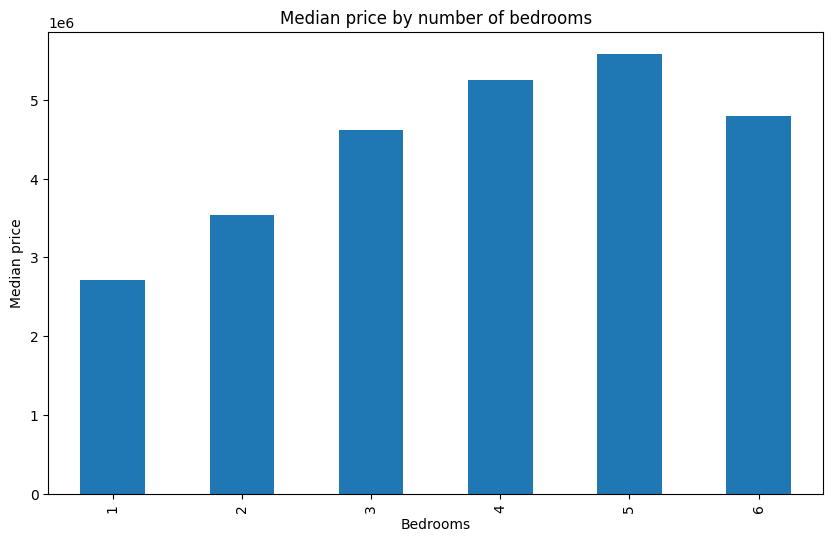

In [25]:
# Cell 8 — median price by bedrooms (bar chart)
if {'price','bedrooms'}.issubset(df.columns):
    med_by_bed = df.groupby('bedrooms')['price'].median().sort_index()
    med_by_bed.plot(kind='bar', xlabel='Bedrooms', ylabel='Median price', title='Median price by number of bedrooms')
    plt.show()


In [26]:
# Cell 9 — median price by zipcode (top 12)
if {'price','zipcode'}.issubset(df.columns):
    med_zip = df.groupby('zipcode')['price'].median().sort_values(ascending=False).head(12)
    med_zip.plot(kind='bar', xlabel='Zipcode', ylabel='Median price', title='Top 12 zipcodes by median price')
    plt.show()


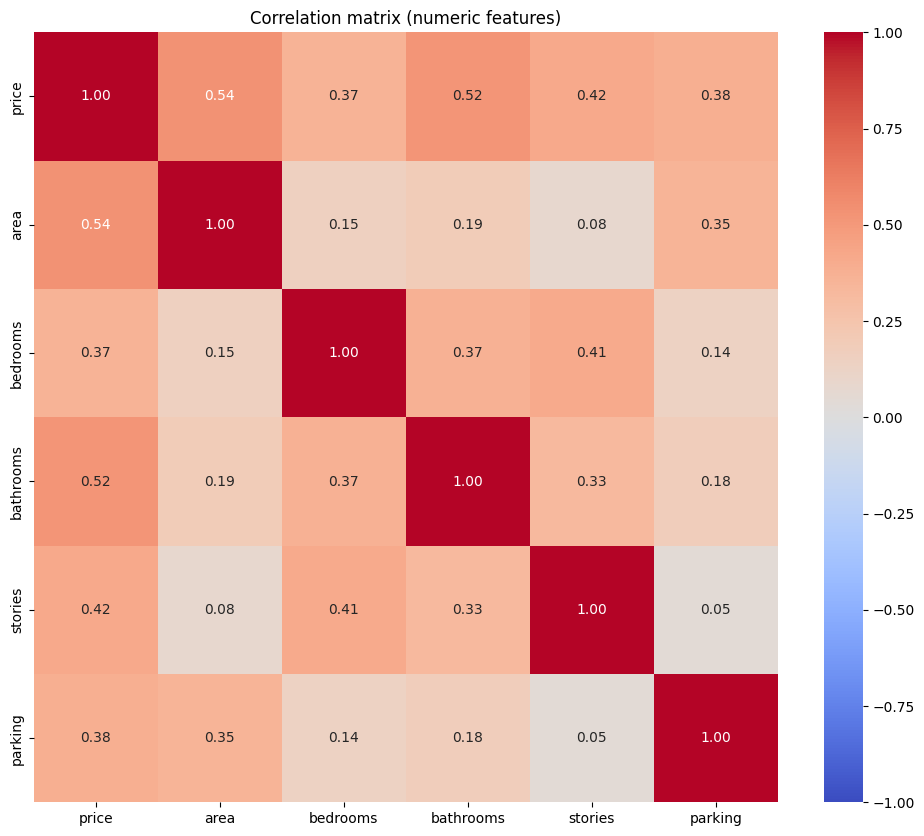

In [27]:
# Cell 10 — correlation heatmap (numeric cols)
num = df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
corr = num.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix (numeric features)")
plt.show()


In [28]:
# Cell 11 — show top 5 most expensive homes
if 'price' in df.columns:
    print("Top 5 most expensive homes:")
    display(df.sort_values('price', ascending=False).head(5)[['price','area','bedrooms','bathrooms','furnishingstatus']])

Top 5 most expensive homes:


,price,area,bedrooms,bathrooms,furnishingstatus
0,13300000,7420,4,2,furnished
2,12250000,9960,3,2,semi-furnished
1,12250000,8960,4,4,furnished
3,12215000,7500,4,2,furnished
4,11410000,7420,4,1,furnished


In [29]:
# Cell 12 — quick takeaways / save cleaned CSV
# df.to_csv("housing_cleaned.csv", index=False)


In [30]:
# Useful single-line outputs to copy into story:
median_price = df['price'].median()
mean_price = df['price'].mean()
top5_mean_price = df['price'].nlargest(5).mean()
corr_area_price = df['price'].corr(df['area'])
median_price_group = df.groupby('bedrooms')['price'].median().idxmax()  # bedrooms with highest median
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print("median_price", median_price)
print("mean_price", mean_price)
print("corr(price, area)", corr_area_price)
print("group with highest median price", median_price_group)
print("IQR price", iqr_price)

median_price 4340000.0
mean_price 4766729.247706422
corr(price, area) 0.5359973457780796
group with highest median price 5
IQR price 2310000.0


"In this housing dataset, the median listing price is [median_price], while the mean price is [mean_price], indicating [a slight right-skew / heavy tail] in prices."

"Home size (sqft_living) shows a [round(corr_sqft_price,2)] correlation with price, meaning larger homes generally command higher prices."

"When we grouped by bedroom count, properties with [bedrooms_with_highest_median] bedrooms had the highest median price (≈ [median_price_for_that_bed])."

"Geographically, the most expensive area in the dataset is [zipcode_label], with a median price of [median_for_zip], while the bottom decile of zipcodes have medians near [bottom_median]."

"Prices are somewhat dispersed — the interquartile range (IQR) of price is [iqr_price] — suggesting a meaningful difference between typical lower- and upper-priced homes."

"A scatterplot of price vs. sqft_living shows a positive trend but also substantial variance, implying other factors (age, condition, lot size, neighborhood) influence price."

"Top-5 most expensive homes average around [top5_mean_price], and these listings tend to have [large lot sizes / luxury features / newer year_built — check your dataset]."

"Recommendation: for a quick price estimate, use sqft_living plus zipcode median as the baseline; for a more accurate model include condition, grade, and year_built."
